# Imports and Paths

In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

In [2]:
from palettable.cartocolors.qualitative import Prism_8
prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = '#303039'
#importing plotting parameters
style = '/Users/gleung/OneDrive - Colostate/03 Resources/00 Code Repository/styles/bee-paperlight.mplstyle'
plt.style.use(style)

In [4]:
mainPath = '/Users/gleung/OneDrive - Colostate/01 Projects/04.01 SatelliteLCC/'

dataPath = f"{mainPath}00 Data/"
figPath = f"{mainPath}03 Output/"
anaPath = f"{mainPath}02 Pipeline/"

# Read GFC Data

In [20]:
print(os.listdir(f"{dataPath}GFC2021_v1.9/treecover2000/"))

['Hansen_GFC-2021-v1.9_treecover2000_10N_100E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_30N_130E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_10N_090E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_10N_120E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_30N_110E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_30N_090E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_30N_100E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_10N_130E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_30N_120E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_10N_110E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_00N_100E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_20N_130E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_00N_090E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_00N_120E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_20N_110E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_20N_090E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_20N_100E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_00N_130E.tif', 'Hansen_GFC-2021-v1.9_treecover2000_20N_120E.tif', 'Hansen_GFC-2021-v1.9_treecove

/Users/gleung/OneDrive - Colostate/01 Projects/04.01 SatelliteLCC/00 Data/GFC2021_v1.9/treecover2000/Hansen_GFC-2021-v1.9_treecover2000_10N_110E.tif
/Users/gleung/OneDrive - Colostate/01 Projects/04.01 SatelliteLCC/00 Data/GFC2021_v1.9/treecover2000/Hansen_GFC-2021-v1.9_treecover2000_10N_120E.tif
/Users/gleung/OneDrive - Colostate/01 Projects/04.01 SatelliteLCC/00 Data/GFC2021_v1.9/treecover2000/Hansen_GFC-2021-v1.9_treecover2000_20N_110E.tif
/Users/gleung/OneDrive - Colostate/01 Projects/04.01 SatelliteLCC/00 Data/GFC2021_v1.9/treecover2000/Hansen_GFC-2021-v1.9_treecover2000_20N_120E.tif


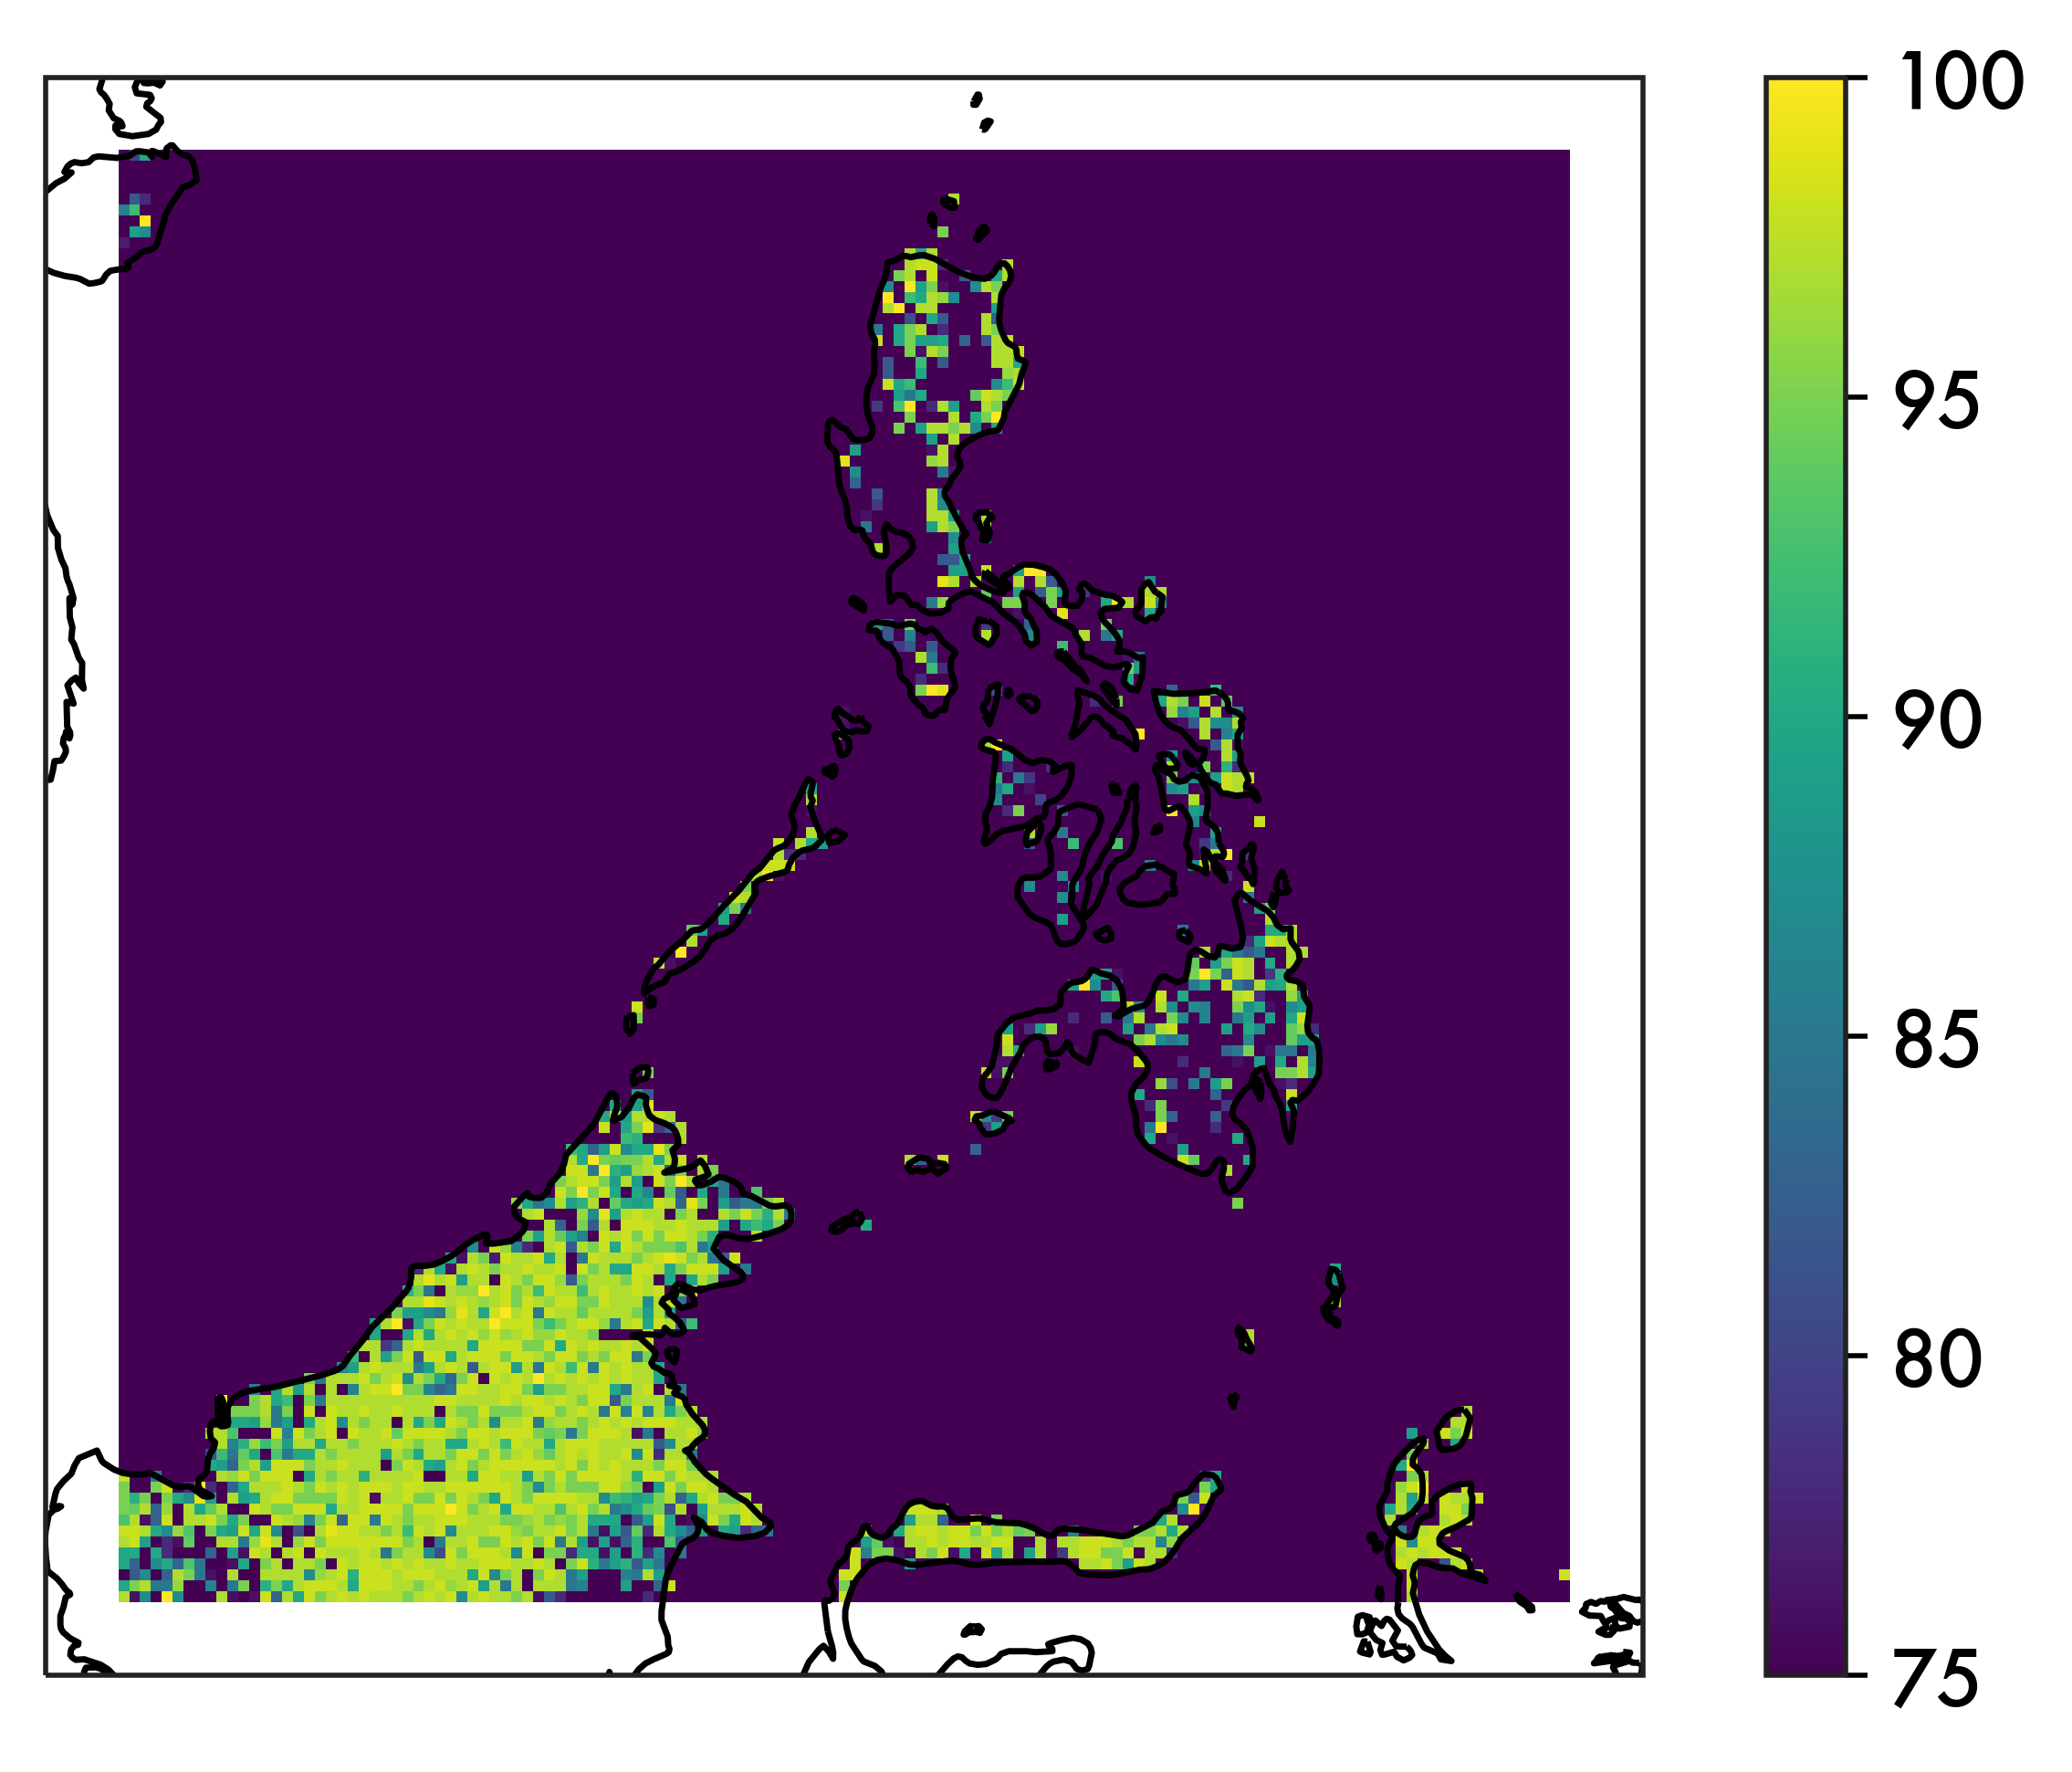

In [100]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection':ccrs.PlateCarree()})

res = 600

for lat in [10,20]:#[0,10,20,30]:
    for lon in [110,120]:#[90,100,110,120,130]:
        path = f"{dataPath}GFC2021_v1.9/treecover2000/Hansen_GFC-2021-v1.9_treecover2000_{str(lat).zfill(2)}N_{str(lon).zfill(3)}E.tif"

        print(path)

        im = PIL.Image.open(path)

        data = np.array(im)
        sub = data[::-res,::res]

        lats = np.linspace(lat-10, lat, sub.shape[0])
        lons = np.linspace(lon, lon+10, sub.shape[1])

        c = ax.pcolormesh(lons, lats, sub, vmin = 75, vmax = 100)
    
ax.coastlines()
plt.colorbar(c, ax = ax)
plt.show()

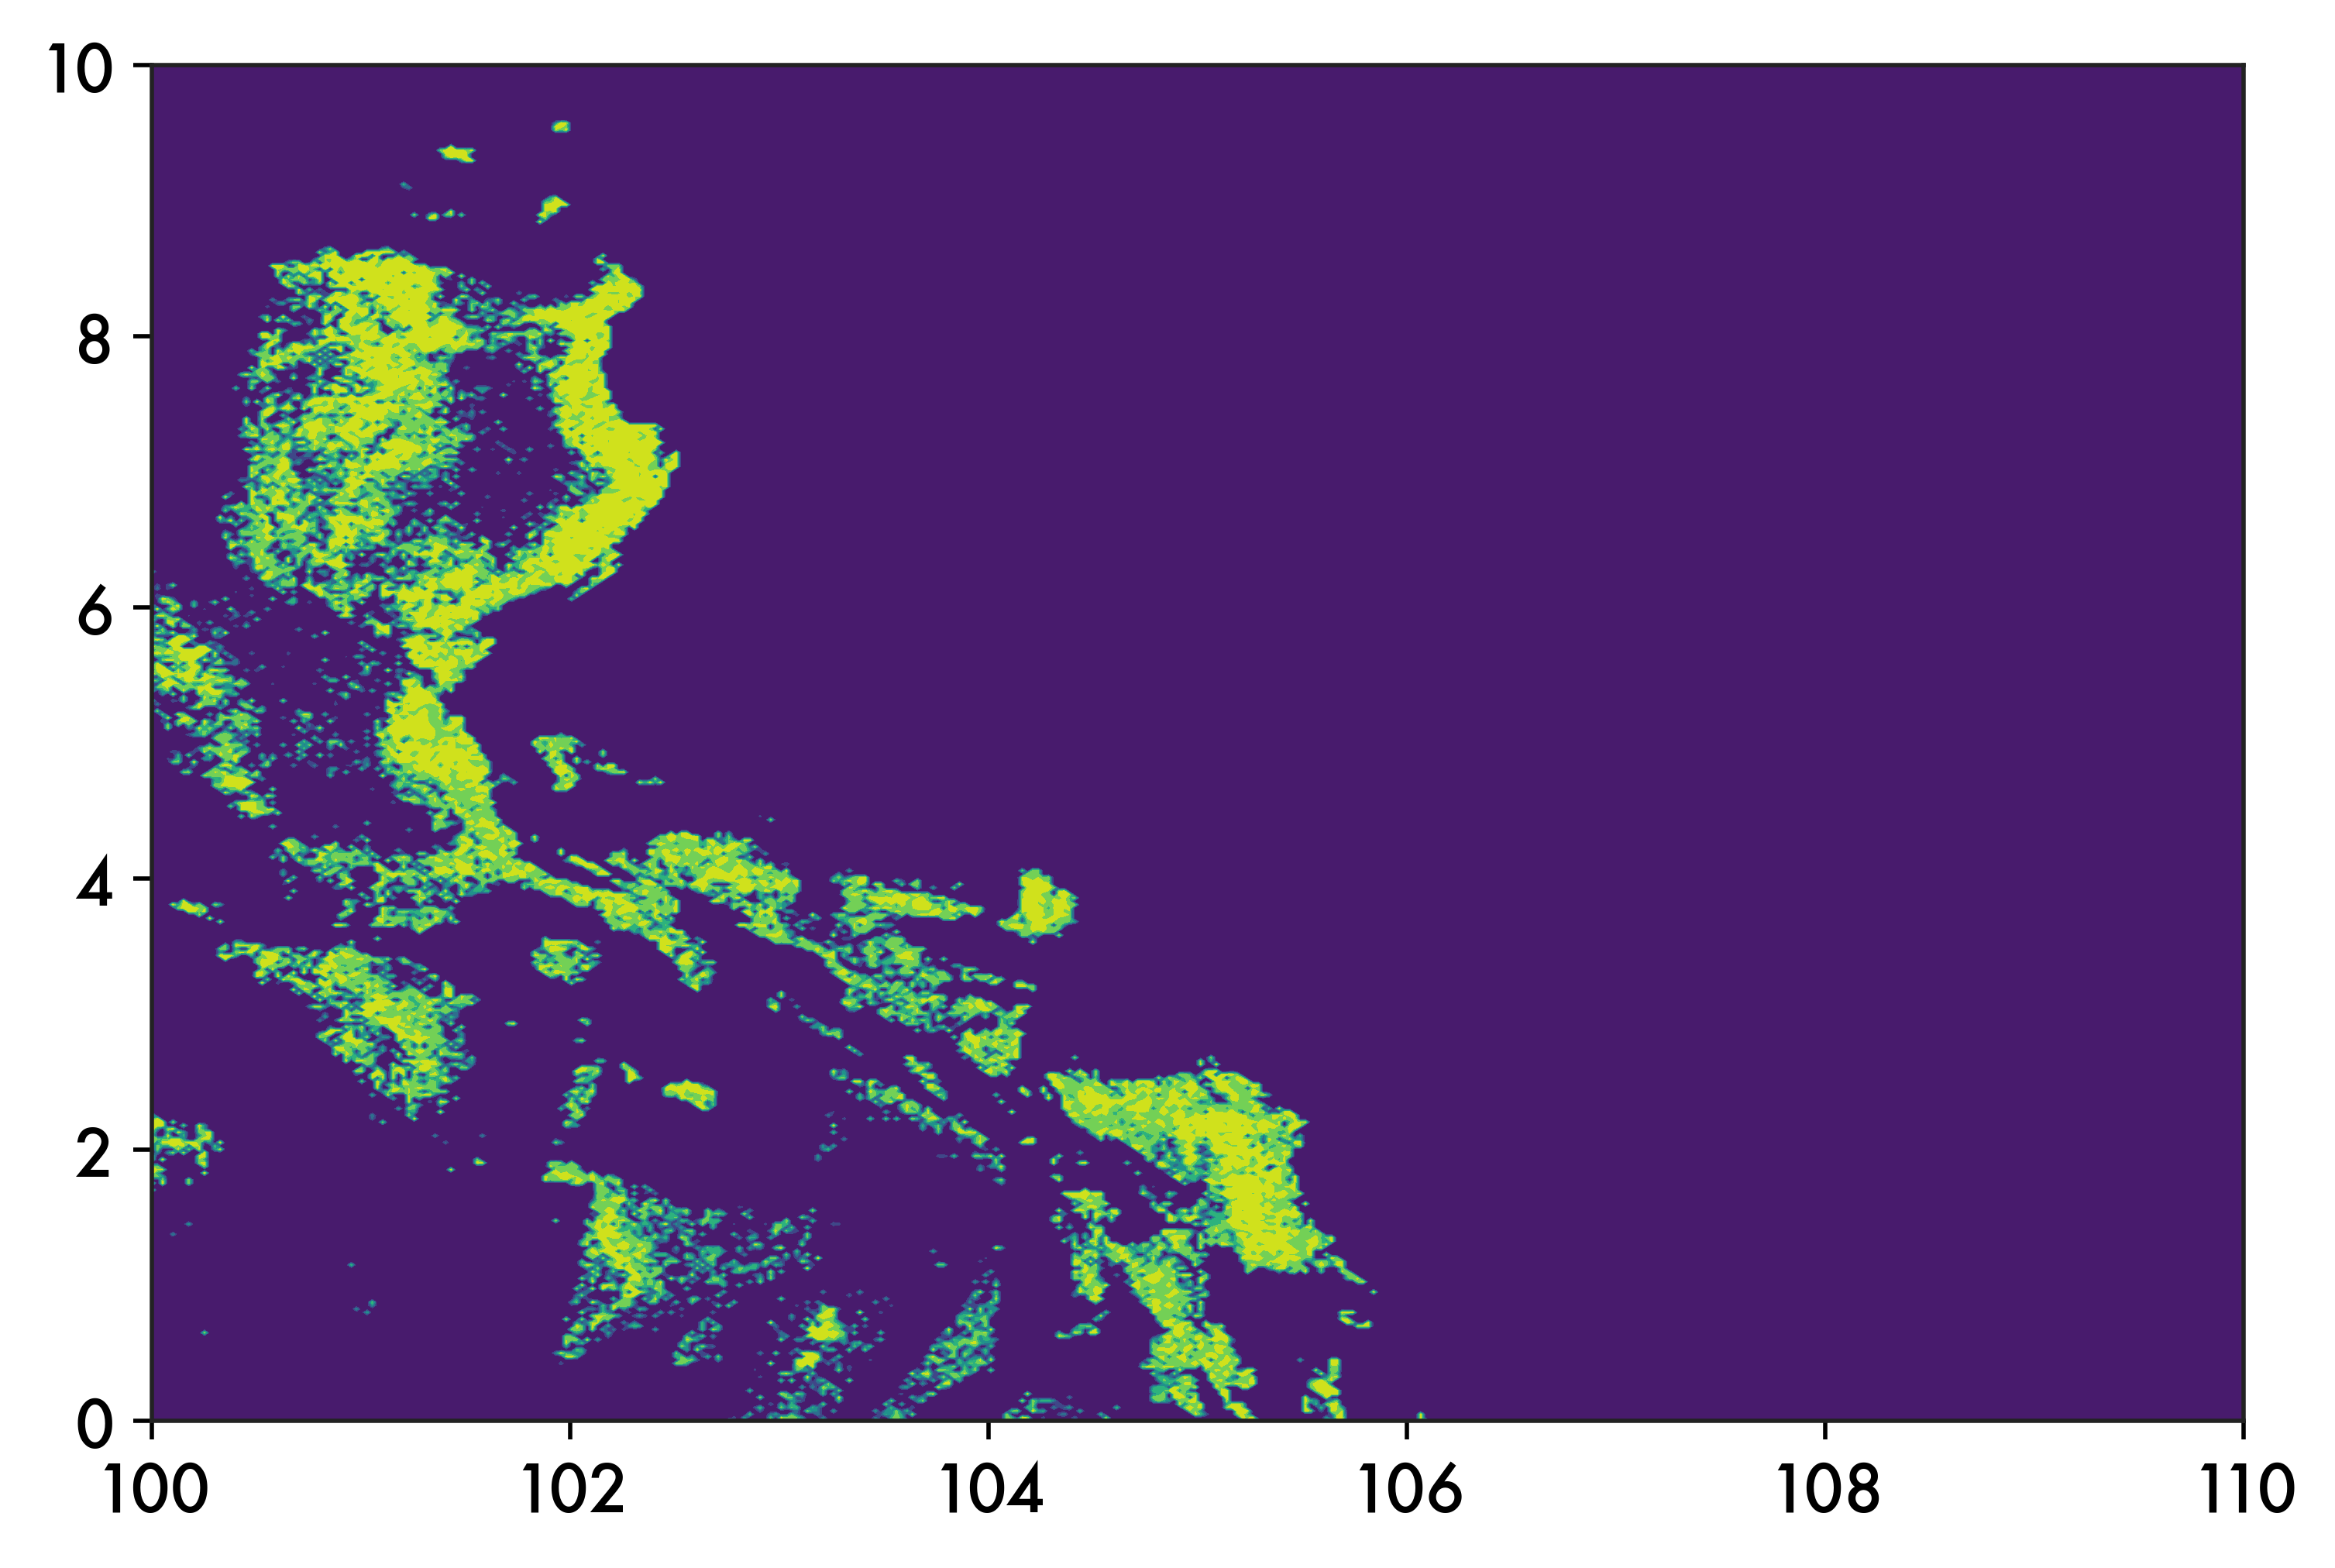